In [278]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler,  Imputer, LabelBinarizer, OneHotEncoder,StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,StratifiedKFold, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

In [95]:

df_train=pd.read_csv('E:\\Kaggle\\dont-overfit-ii\\train.csv')
df_test=pd.read_csv('E:\\Kaggle\\dont-overfit-ii\\test.csv')

In [134]:
def get_num_cols(df):
    colum_ind=[]
    for i in range(300):
        colum_ind.append(str(i))
    return df[colum_ind]

vec = make_union(*[
    make_pipeline(FunctionTransformer(get_num_cols, validate=False),StandardScaler() ),
])


In [135]:
x_train = vec.fit_transform(df_train)
x_test = vec.transform(df_test)
y_train = df_train['target']

In [172]:
scorer='roc_auc'
n_fold=15
cv_strategy = StratifiedShuffleSplit(n_splits=n_fold,test_size=0.3, random_state=3)

In [318]:

tt=np.arange(0.101503,0.101505,0.0000001)
tt

array([0.101503 , 0.1015031, 0.1015032, 0.1015033, 0.1015034, 0.1015035,
       0.1015036, 0.1015037, 0.1015038, 0.1015039, 0.101504 , 0.1015041,
       0.1015042, 0.1015043, 0.1015044, 0.1015045, 0.1015046, 0.1015047,
       0.1015048, 0.1015049, 0.101505 ])

In [319]:
model=LogisticRegression()
#1.120,1.121,1.122,1.123,1.124,1.125,1.126,1.127,1.128,1.129
#0.09,0.091,0.092,0.093,0.094,0.095,0.096,0.097
#0.001, 0.01, 0.1, 1.0, 10.0, 100.0
parameter_grid = {'penalty' : ['l1','l2'],
                  'C' : tt,
                  'solver': ['liblinear'],
                  'class_weight' : ['balanced', None],
                }

grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cv_strategy, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.773045267489712
Best parameters: {'C': 0.1015032, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [324]:
model_best=LogisticRegression(**grid_search.best_params_)
model_best.fit(x_train, y_train)

LogisticRegression(C=0.1015032, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [329]:
cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv_strategy)

array([0.80864198, 0.75540123, 0.80169753, 0.81558642, 0.83179012,
       0.78395062, 0.78240741, 0.68441358, 0.77083333, 0.8287037 ,
       0.76929012, 0.67746914, 0.72839506, 0.78935185, 0.76774691])

In [330]:
mean=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv).mean()
std=cross_val_score(model_best,x_train,y_train,scoring=scorer,cv=cv).std()

In [331]:
print('CV mean score: {}' .format(mean),'std: +/-{}' .format(std))

CV mean score: 0.7670524691358025 std: +/-0.06307033819636798


In [332]:

y_test=model_best.predict(x_test)
df_predicted = pd.DataFrame({'id': df_test['id'], 'target': y_test})
df_predicted.to_csv('E:\\Kaggle\\dont-overfit-ii\\sample_submission_model_best_logreg.csv', sep=',', index=False)    

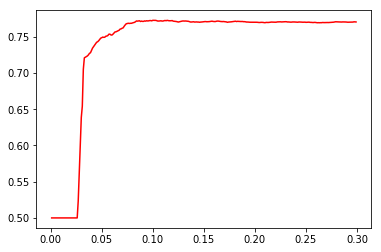

In [322]:
X=[]
for i in tt1:
    X.append(cross_val_score(LogisticRegression(C=i,class_weight='balanced',penalty='l1',solver='liblinear'), x_train,y_train,scoring=scorer,cv=cv_strategy).mean())
plt.plot(tt1,X, c='red')

In [328]:
tt1=np.arange(0.001,0.3,0.001)


In [87]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
sss.get_n_splits(X, y)
print(sss)

StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.3,
            train_size=None)


In [88]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 4 2 5] TEST: [1 3]
TRAIN: [5 1 2 3] TEST: [4 0]
TRAIN: [5 2 4 0] TEST: [1 3]
TRAIN: [2 1 4 5] TEST: [0 3]
TRAIN: [0 3 2 4] TEST: [1 5]
